# SeismicArray Demo

This notebook demonstrates how to use the SeismicArray class for array-derived rotation (ADR) computation.


## 1. Load Libraries


In [10]:
import yaml

from obspy import UTCDateTime
from sixdegrees.seismicarray import seismicarray


## 2. Initialize SeismicArray

Now we can create a SeismicArray instance using our configuration.


In [11]:
# setup array instance
array = seismicarray('./config/array_config.yml')

# Show array configuration
array.show_array_info()


├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH04', 'PY.BPH05', 'PY.BPH06', 'PY.BPH07', 'PY.BPH08', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12', 'PY.BPH13']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── response_output: VEL
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
└── station_distances


## 3. Get Station Inventories

Fetch station metadata and compute inter-station distances.


In [12]:
# Define time window
tbeg = UTCDateTime("2025-07-29 23:30:00")
tend = UTCDateTime("2025-07-30 00:30:00")

# Get inventories
array.request_inventories(tbeg, tend)

# Compute distances
array.compute_station_distances()


In [13]:
array.show_array_info()

├── stations: ['PY.PFOIX', 'PY.BPH01', 'PY.BPH02', 'PY.BPH03', 'PY.BPH04', 'PY.BPH05', 'PY.BPH06', 'PY.BPH07', 'PY.BPH08', 'PY.BPH09', 'PY.BPH10', 'PY.BPH11', 'PY.BPH12', 'PY.BPH13']
├── reference_station: PY.PFOIX
├── channel_prefix: B
├── response_output: VEL
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
        │   ├── PY.PFOIX
                │   │   ├── latitude: 33.6106
                │   │   ├── longitude: -116.4554
                │   │   └── elevation: 1280.0
        │   ├── PY.BPH01
                │   │   ├── latitude: 33.611
                │   │   ├── longitude: -116.455498
                │   │   └── elevation: 1292.0
        │   ├── PY.BPH02
                │   │   ├── latitude: 33.6106
                │   │   ├── longitude: -116.455
                │   │   └── elevation: 1289.0
        │   ├── PY.BPH03
                │   │   ├── latitude: 33.6102
                │   │   ├── longitude: -11

## 4. Check Array Geometry


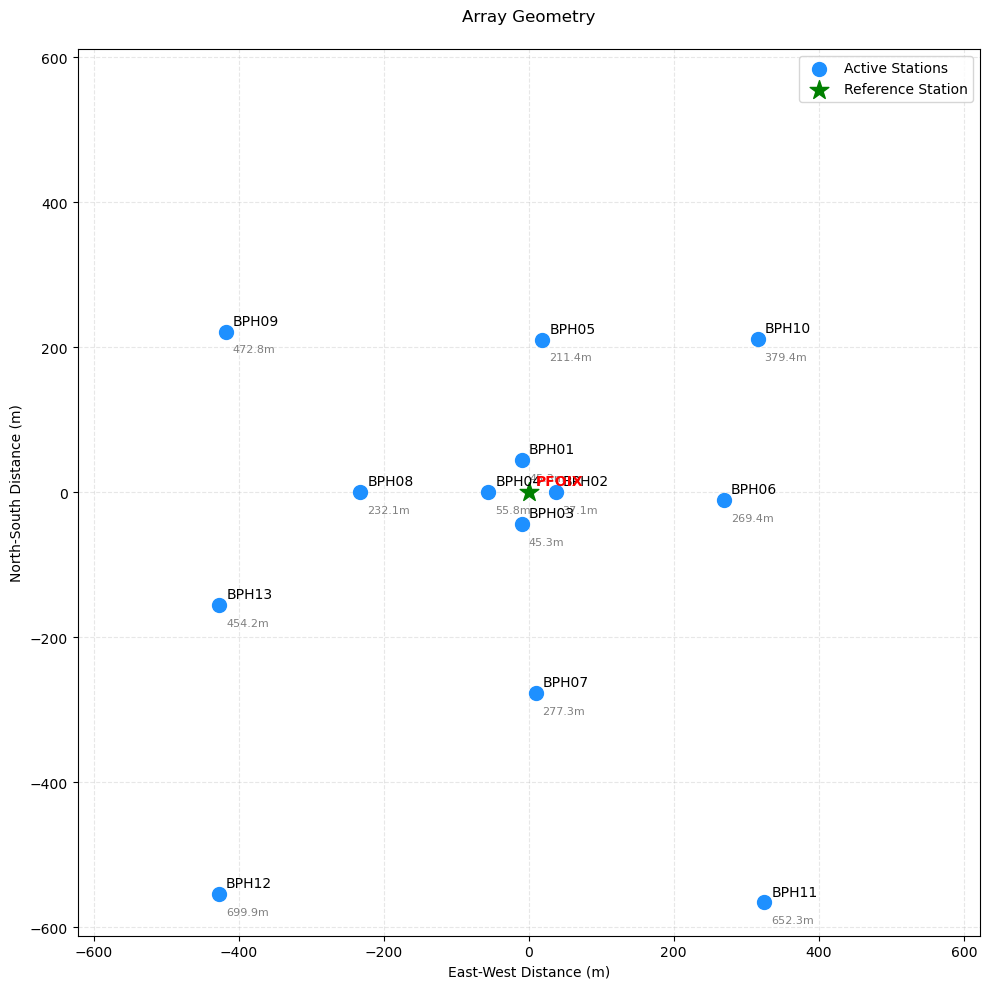

In [14]:
array.plot_array_geometry(
    show_dropped=True,
    # save_path='./figures/array_geometry.png'
    )

## 5. Check Array Distance and Frequency Range


[0.0, 3.235391510770212, 6.446159738560655, 9.607868798442983, 12.696456175379364, 15.688415854491264, 16.888690340518764, 21.292278333522297, 23.86153235627133, 24.940725437688002, 21.551087608203346, 17.997432989117783, 1.52750442243007, 10.507297646313734, 6.627821375221375, 2.6979033814756033, 1.2525472860417883, 5.193465312403681, 9.094857931838078, 0.13258856573713018, 1.4353788233841422, 2.5185773117911356, 6.453365552865112, 10.339039785433126, 14.146027682351084, 17.845355767001323, 21.40886991894424, 24.809449643774897, 23.861532356271336, 8.35407665801921, 18.56097721602599, 15.688415854491266, 0.061052168919076166, 9.607868798442993, 6.446159738560653, 3.2353915107702127, 4.5461282673306366e-15, 3.2353915107702034, 6.44615973856066, 9.607868798442984, 12.69645617537936, 15.688415854491257, 16.888690340518878, 21.2922783335223, 23.86153235627133, 24.94072543768801, 21.551087608203353, 17.997432989117794, 1.5275044224302974, 10.507297646313724, 6.627821375221361, 2.6979033814

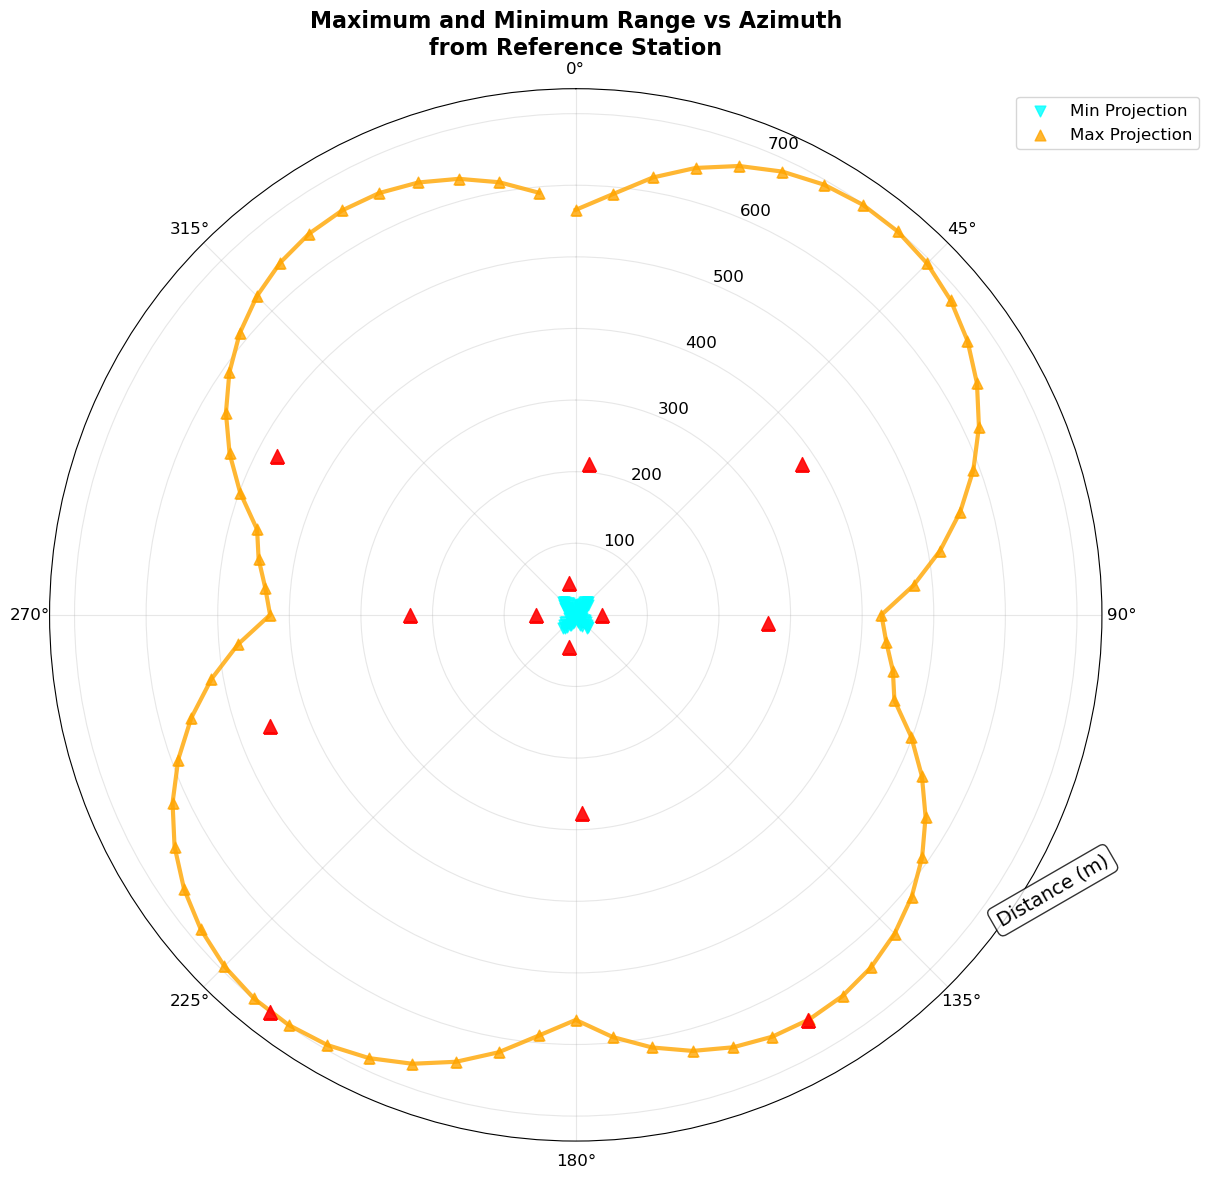

In [15]:
from sixdegrees.seismicarray import seismicarray
from obspy import UTCDateTime

# Initialize array and get station data
array = seismicarray("./config/array_config.yml")

# Define time window
tbeg = UTCDateTime("2025-07-29 23:30:00")
tend = UTCDateTime("2025-07-30 00:30:00")

# Get inventories
array.request_inventories(tbeg, tend)

# Compute azimuth distance range
results = array.compute_azimuth_distance_range(
    azimuth_step=5.0,  # 5-degree steps
    show_station_labels=False,
)


In [18]:
# Convert to frequencies
freq_results = array.convert_distances_to_frequencies(
    apparent_velocity=3000.0,
    optional_amplitude_uncertainty=0.02
)

# Access different bounds
print("Optimistic fmin:", freq_results['fmin_optimistic'])
print("Optimistic fmax:", freq_results['fmax_optimistic'])
print("Conservative fmin:", freq_results['fmin_conservative'])
print("Conservative fmax:", freq_results['fmax_conservative'])

Optimistic fmin: 0.09
Optimistic fmax: 72.54
Conservative fmin: 0.14
Conservative fmax: 30.07


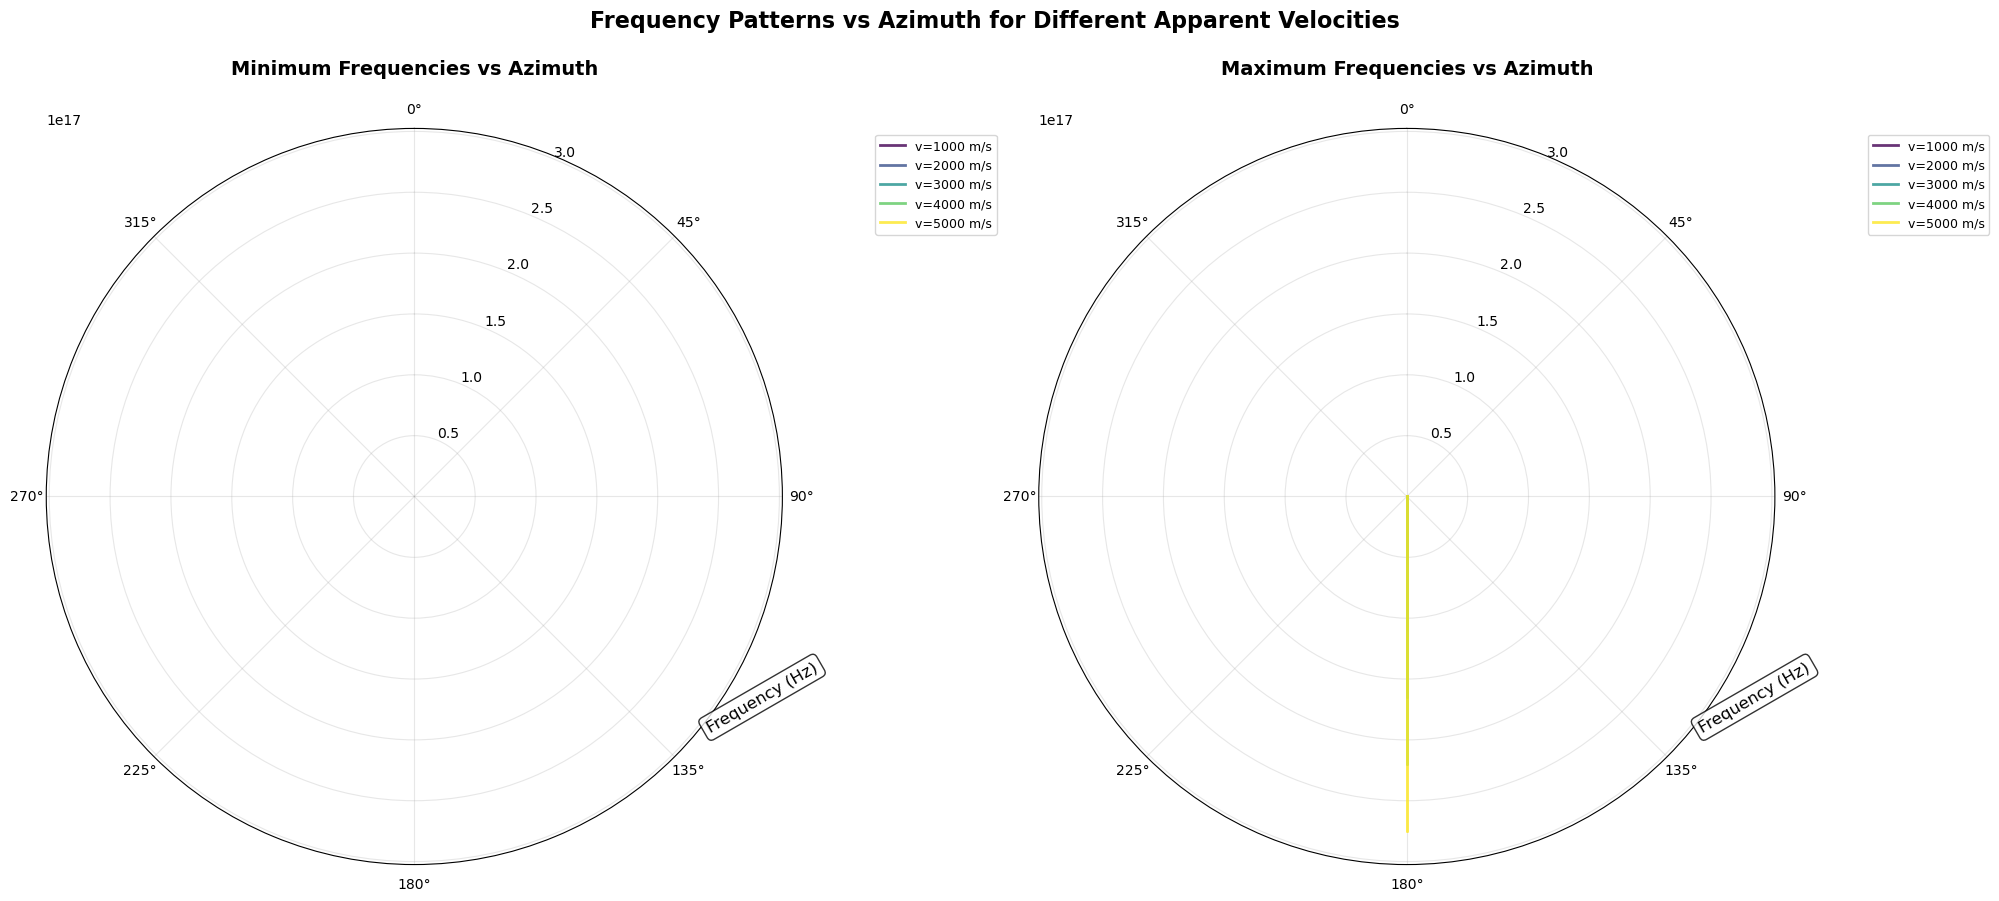

In [19]:
# Plot frequency patterns for different velocities
velocity_range = [1000, 2000, 3000, 4000, 5000]  # m/s
array.plot_frequency_patterns(
    velocity_range=velocity_range,
    optional_amplitude_uncertainty=0.02,
    # save_path="frequency_patterns.png"
)